## *Iris* — Clasificación del conjunto de datos 

El problema de clasificación **Iris** es uno de los ejemplos más conocidos en el ámbito del aprendizaje automático. Se utiliza con frecuencia para mostrar cómo un modelo puede aprender a **distinguir entre clases similares**.

Este conjunto de datos contiene **150 muestras** de flores pertenecientes a **tres especies**: *Iris setosa*, *Iris versicolor* e *Iris virginica*.
Cada flor se describe mediante **cuatro características**:

- Longitud del sépalo
- Ancho del sépalo
- Longitud del pétalo
- Ancho del pétalo

Estas variables permiten al modelo identificar patrones que diferencian a cada especie.

---

### Hiperparámetros utilizados

| Parámetro | Valor |
|----------|-------|
| Optimizador | Adagrad |
| Tasa de aprendizaje | 0.03 |
| Número de épocas | 1000 |
| Función de activación | Leaky ReLU |
| Arquitectura de la red | 3 capas |
| Neuronas por capa | 4 → 10 → 3 |


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import os
import random


In [2]:
from main.neural_network.neural_network import train, create_nn, test_nn
from main.neural_network.layers.activation.functions import Tanh, LeakyRelu, Sigmoid, Relu
from main.neural_network.utils.graphics.regression import learning_curve
from main.neural_network.optimizers.rmsprop import RMSProp
from main.neural_network.optimizers.sgd import SGD
from main.neural_network.optimizers.momentum import Momentum
from main.neural_network.optimizers.adagrad import Adagrad
from main.neural_network.losses.cross_entropy import CrossEntropyLoss
from main.neural_network.utils.graphics.classification import display_confusion_matrix
from main.neural_network.utils.categorical import to_categorical

In [3]:
SEED = 78
random.seed(SEED)
np.random.seed(SEED)
os.environ["PYTHONHASHSEED"] = str(SEED)

In [4]:
X, y = load_iris(return_X_y=True, as_frame=False)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=SEED,  
    shuffle=True
)

y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

X_train = X_train.reshape(X_train.shape[0], 4, 1)
X_test  = X_test.reshape(X_test.shape[0], 4, 1)
y_train = y_train.reshape(y_train.shape[0], 3, 1)
y_test  = y_test.reshape(y_test.shape[0], 3, 1)

In [6]:
species_map = {
    0: "Iris setosa",
    1: "Iris versicolor",
    2: "Iris virginica"
}

sample_df = pd.DataFrame(
    X_train[:, :, 0],
    columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
)

sample_df['Species'] = [
    species_map[idx] for idx in np.argmax(y_train[:, :, 0], axis=1)
]

class_counts = sample_df['Species'].value_counts()

styled_table = (
    sample_df.head(10)
    .style
    .set_caption("Primeras 10 muestras del conjunto de entrenamiento (Iris)")
    .set_table_attributes('style="width:75%; margin:auto;"')
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '13pt'), ('text-align', 'center')]},
        {'selector': 'td', 'props': [('font-size', '11pt'), ('text-align', 'center')]}
    ])
)

display(styled_table)

print("\n" + "══════════════ RESULTADOS ═════════════════════════════════".center(60, " ") + "\n")
print("Distribución de clases en el conjunto de entrenamiento:\n")
print(class_counts)

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,6.100000,2.900000,4.700000,1.400000,Iris versicolor
1,5.100000,3.400000,1.500000,0.200000,Iris setosa
2,6.400000,2.900000,4.300000,1.300000,Iris versicolor
3,7.400000,2.800000,6.100000,1.900000,Iris virginica
4,7.700000,3.800000,6.700000,2.200000,Iris virginica
5,5.500000,2.500000,4.000000,1.300000,Iris versicolor
6,6.100000,3.000000,4.900000,1.800000,Iris virginica
7,4.800000,3.000000,1.400000,0.300000,Iris setosa
8,4.900000,3.100000,1.500000,0.100000,Iris setosa
9,4.900000,3.600000,1.400000,0.100000,Iris setosa



══════════════ RESULTADOS ═════════════════════════════════ 

Distribución de clases en el conjunto de entrenamiento:

Iris setosa        40
Iris virginica     38
Iris versicolor    34
Name: Species, dtype: int64


In [7]:
optimizers = [
    Adagrad(learning_rate=0.04),
    Adagrad(learning_rate=0.07),
    Adagrad(learning_rate=0.07)
]

activations = [LeakyRelu(), LeakyRelu(), LeakyRelu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 10, 3], activation_function=activations, optimizers=optimizers)
train_loss = train(nn, loss, X_train, y_train, epochs=1000)

In [8]:
y_true, y_pred = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 97.37%


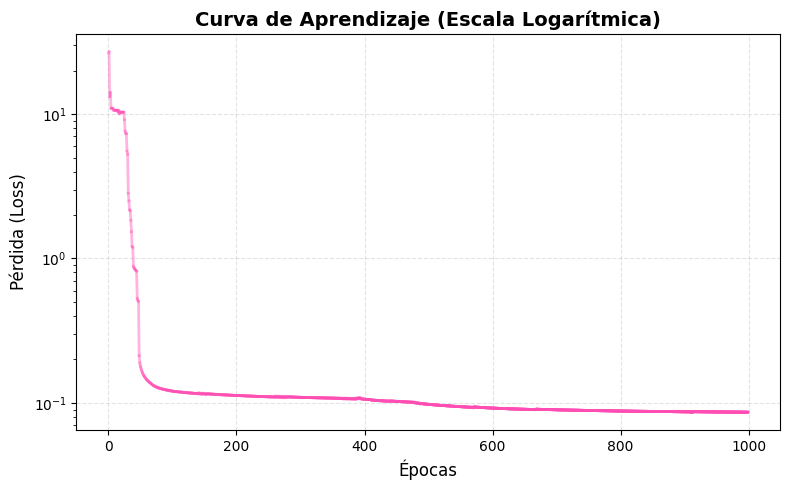

In [9]:
learning_curve(train_loss)

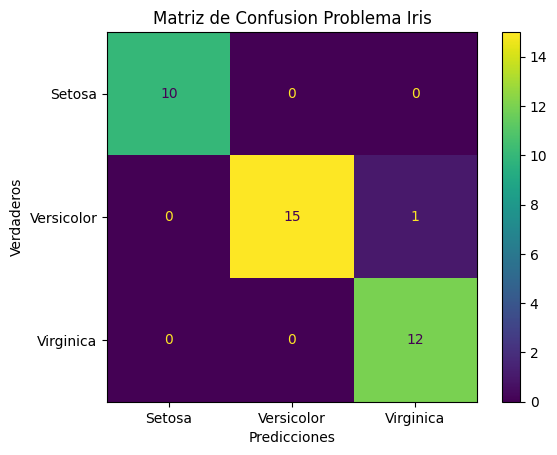

In [10]:
display_confusion_matrix(y_true, y_pred, ['Setosa', 'Versicolor', 'Virginica'], title='Matriz de Confusion Problema Iris')

# Experimentos

### Primer test

In [11]:
optimizers = [
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03),
    SGD(learning_rate=0.03)
]

activations = [Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 4, 3], activation_function=activations, optimizers=optimizers)

In [12]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [13]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 94.74%


### Segundo test

In [14]:
optimizers = [
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02),
    RMSProp(learning_rate=0.02)
]

activations = [Tanh(), Tanh(), Tanh(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 10, 8, 4, 3], activation_function=activations, optimizers=optimizers)

In [15]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [16]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 94.74%


### Tercer test

In [17]:

optimizers = [
    Momentum(learning_rate=0.01),
    Adagrad(learning_rate=0.02)
]

activations = [Sigmoid(), Tanh()]

loss = CrossEntropyLoss()

nn = create_nn([4, 6, 3], activation_function=activations, optimizers=optimizers)

In [18]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [19]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 89.47%


### Cuarto tests

In [23]:
optimizers = [
    Adagrad(learning_rate=0.002)
]

activations = [Relu()]

loss = CrossEntropyLoss()

nn = create_nn([4, 3], activation_function=activations, optimizers=optimizers)

In [24]:
_ = train(nn, loss, X_train, y_train, epochs=1000)

In [25]:
_, _ = test_nn(nn, x_test=X_test, y_test=y_test)

Accuracy: 57.89%
